In [27]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [28]:
from keras import regularizers

In [29]:
import os
import pandas as pd

In [30]:
mylist= os.listdir('Data/')

In [31]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('fearful')
    elif item[:1]=='a':
        feeling_list.append('angry')
    elif item[:1]=='f':
        feeling_list.append('fearful')
    elif item[:1]=='h':
        feeling_list.append('happy')
    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    elif item[:2]=='sa':
        feeling_list.append('sad')

In [32]:
labels = pd.DataFrame(feeling_list)
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('Data/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1      
labels 

,0
0,calm
1,calm
2,calm
3,calm
4,calm
...,...
1875,fearful
1876,fearful
1877,fearful
1878,fearful


In [33]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [34]:
newdf = pd.concat([df3,labels], axis=1)

In [35]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [36]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)

In [37]:
rnewdf=rnewdf.fillna(0)

In [38]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [39]:
trainfeatures = train.iloc[:, :-1]

In [40]:
trainlabel = train.iloc[:, -1:]

In [41]:
testfeatures = test.iloc[:, :-1]

In [42]:
testlabel = test.iloc[:, -1:]

In [43]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [44]:
y_train

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [45]:
X_train.shape

(1488, 216)

In [51]:

x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)



In [52]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(5))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_10 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_11 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 27, 128)          

In [54]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [55]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))

Epoch 1/700
93/93 [==============================] - 2s 25ms/step - loss: 1.7264 - accuracy: 0.2171 - val_loss: 1.5797 - val_accuracy: 0.2449
Epoch 2/700
93/93 [==============================] - 2s 23ms/step - loss: 1.5781 - accuracy: 0.2594 - val_loss: 1.5675 - val_accuracy: 0.2628
Epoch 3/700
93/93 [==============================] - 2s 24ms/step - loss: 1.5593 - accuracy: 0.2742 - val_loss: 1.5338 - val_accuracy: 0.3112
Epoch 4/700
93/93 [==============================] - 2s 25ms/step - loss: 1.5462 - accuracy: 0.3051 - val_loss: 1.5404 - val_accuracy: 0.3138
Epoch 5/700
93/93 [==============================] - 2s 24ms/step - loss: 1.5368 - accuracy: 0.3226 - val_loss: 1.5218 - val_accuracy: 0.3214
Epoch 6/700
93/93 [==============================] - 2s 24ms/step - loss: 1.5252 - accuracy: 0.3165 - val_loss: 1.5174 - val_accuracy: 0.3342
Epoch 7/700
93/93 [==============================] - 2s 24ms/step - loss: 1.5145 - accuracy: 0.3394 - val_loss: 1.4984 - val_accuracy: 0.3571
Epoch 

93/93 [==============================] - 2s 25ms/step - loss: 1.0972 - accuracy: 0.5571 - val_loss: 1.2196 - val_accuracy: 0.5128
Epoch 116/700
93/93 [==============================] - 2s 25ms/step - loss: 1.0982 - accuracy: 0.5551 - val_loss: 1.2175 - val_accuracy: 0.5102
Epoch 117/700
93/93 [==============================] - 2s 24ms/step - loss: 1.1024 - accuracy: 0.5511 - val_loss: 1.2114 - val_accuracy: 0.4923
Epoch 118/700
93/93 [==============================] - 2s 25ms/step - loss: 1.0987 - accuracy: 0.5544 - val_loss: 1.2251 - val_accuracy: 0.4898
Epoch 119/700
93/93 [==============================] - 2s 25ms/step - loss: 1.0977 - accuracy: 0.5551 - val_loss: 1.2252 - val_accuracy: 0.4923
Epoch 120/700
93/93 [==============================] - 2s 24ms/step - loss: 1.0903 - accuracy: 0.5571 - val_loss: 1.2519 - val_accuracy: 0.4770
Epoch 121/700
93/93 [==============================] - 2s 24ms/step - loss: 1.0964 - accuracy: 0.5504 - val_loss: 1.2230 - val_accuracy: 0.4974
Epoch 

Epoch 172/700
93/93 [==============================] - 2s 24ms/step - loss: 1.0211 - accuracy: 0.5995 - val_loss: 1.2322 - val_accuracy: 0.4872
Epoch 173/700
93/93 [==============================] - 2s 24ms/step - loss: 1.0175 - accuracy: 0.5853 - val_loss: 1.2082 - val_accuracy: 0.4923
Epoch 174/700
93/93 [==============================] - 2s 24ms/step - loss: 1.0157 - accuracy: 0.5988 - val_loss: 1.2374 - val_accuracy: 0.4796
Epoch 175/700
93/93 [==============================] - 2s 24ms/step - loss: 1.0182 - accuracy: 0.5988 - val_loss: 1.2152 - val_accuracy: 0.4974
Epoch 176/700
93/93 [==============================] - 2s 24ms/step - loss: 1.0144 - accuracy: 0.5934 - val_loss: 1.2153 - val_accuracy: 0.5026
Epoch 177/700
93/93 [==============================] - 2s 24ms/step - loss: 1.0092 - accuracy: 0.5948 - val_loss: 1.2169 - val_accuracy: 0.4949
Epoch 178/700
93/93 [==============================] - 2s 24ms/step - loss: 1.0076 - accuracy: 0.6069 - val_loss: 1.2064 - val_accuracy:

Epoch 229/700
93/93 [==============================] - 2s 26ms/step - loss: 0.9328 - accuracy: 0.6371 - val_loss: 1.2579 - val_accuracy: 0.4668
Epoch 230/700
93/93 [==============================] - 2s 26ms/step - loss: 0.9387 - accuracy: 0.6142 - val_loss: 1.1936 - val_accuracy: 0.5026
Epoch 231/700
93/93 [==============================] - 2s 26ms/step - loss: 0.9340 - accuracy: 0.6331 - val_loss: 1.2047 - val_accuracy: 0.4898
Epoch 232/700
93/93 [==============================] - 2s 26ms/step - loss: 0.9293 - accuracy: 0.6284 - val_loss: 1.2227 - val_accuracy: 0.5000
Epoch 233/700
93/93 [==============================] - 2s 26ms/step - loss: 0.9311 - accuracy: 0.6196 - val_loss: 1.2006 - val_accuracy: 0.4872
Epoch 234/700
93/93 [==============================] - 2s 26ms/step - loss: 0.9338 - accuracy: 0.6384 - val_loss: 1.2226 - val_accuracy: 0.4821
Epoch 235/700
93/93 [==============================] - 2s 26ms/step - loss: 0.9259 - accuracy: 0.6317 - val_loss: 1.2015 - val_accuracy:

Epoch 286/700
93/93 [==============================] - 2s 26ms/step - loss: 0.8439 - accuracy: 0.6687 - val_loss: 1.1948 - val_accuracy: 0.5077
Epoch 287/700
93/93 [==============================] - 3s 27ms/step - loss: 0.8421 - accuracy: 0.6828 - val_loss: 1.2217 - val_accuracy: 0.4949
Epoch 288/700
93/93 [==============================] - 3s 27ms/step - loss: 0.8399 - accuracy: 0.6747 - val_loss: 1.2173 - val_accuracy: 0.5051
Epoch 289/700
93/93 [==============================] - 2s 26ms/step - loss: 0.8433 - accuracy: 0.6747 - val_loss: 1.1794 - val_accuracy: 0.5153
Epoch 290/700
93/93 [==============================] - 2s 26ms/step - loss: 0.8307 - accuracy: 0.6821 - val_loss: 1.2191 - val_accuracy: 0.4847
Epoch 291/700
93/93 [==============================] - 2s 26ms/step - loss: 0.8386 - accuracy: 0.6680 - val_loss: 1.2308 - val_accuracy: 0.5128
Epoch 292/700
93/93 [==============================] - 3s 27ms/step - loss: 0.8411 - accuracy: 0.6687 - val_loss: 1.2210 - val_accuracy:

Epoch 399/700
93/93 [==============================] - 2s 27ms/step - loss: 0.6625 - accuracy: 0.7668 - val_loss: 1.2437 - val_accuracy: 0.4949
Epoch 400/700
93/93 [==============================] - 2s 27ms/step - loss: 0.6634 - accuracy: 0.7614 - val_loss: 1.2004 - val_accuracy: 0.4821
Epoch 401/700
93/93 [==============================] - 2s 26ms/step - loss: 0.6616 - accuracy: 0.7621 - val_loss: 1.2427 - val_accuracy: 0.4872
Epoch 402/700
93/93 [==============================] - 2s 26ms/step - loss: 0.6608 - accuracy: 0.7594 - val_loss: 1.1949 - val_accuracy: 0.4923
Epoch 403/700
93/93 [==============================] - 2s 27ms/step - loss: 0.6416 - accuracy: 0.7789 - val_loss: 1.2439 - val_accuracy: 0.5051
Epoch 404/700
93/93 [==============================] - 2s 27ms/step - loss: 0.6548 - accuracy: 0.7527 - val_loss: 1.2045 - val_accuracy: 0.4796
Epoch 405/700
93/93 [==============================] - 2s 27ms/step - loss: 0.6553 - accuracy: 0.7547 - val_loss: 1.1908 - val_accuracy:

Epoch 456/700
93/93 [==============================] - 2s 26ms/step - loss: 0.5685 - accuracy: 0.8065 - val_loss: 1.2056 - val_accuracy: 0.5179
Epoch 457/700
93/93 [==============================] - 2s 26ms/step - loss: 0.5714 - accuracy: 0.8105 - val_loss: 1.2212 - val_accuracy: 0.5000
Epoch 458/700
93/93 [==============================] - 2s 26ms/step - loss: 0.5705 - accuracy: 0.8091 - val_loss: 1.2259 - val_accuracy: 0.5051
Epoch 459/700
93/93 [==============================] - 2s 26ms/step - loss: 0.5715 - accuracy: 0.8132 - val_loss: 1.2453 - val_accuracy: 0.4872
Epoch 460/700
93/93 [==============================] - 2s 26ms/step - loss: 0.5617 - accuracy: 0.8098 - val_loss: 1.2354 - val_accuracy: 0.4898
Epoch 461/700
93/93 [==============================] - 2s 26ms/step - loss: 0.5608 - accuracy: 0.8065 - val_loss: 1.2875 - val_accuracy: 0.4770
Epoch 462/700
93/93 [==============================] - 2s 26ms/step - loss: 0.5574 - accuracy: 0.8125 - val_loss: 1.2146 - val_accuracy:

Epoch 569/700
93/93 [==============================] - 3s 27ms/step - loss: 0.3917 - accuracy: 0.8884 - val_loss: 1.2710 - val_accuracy: 0.5077
Epoch 570/700
93/93 [==============================] - 2s 26ms/step - loss: 0.3962 - accuracy: 0.8810 - val_loss: 1.2793 - val_accuracy: 0.5077
Epoch 571/700
93/93 [==============================] - 2s 26ms/step - loss: 0.3926 - accuracy: 0.8837 - val_loss: 1.2687 - val_accuracy: 0.5026
Epoch 572/700
93/93 [==============================] - 2s 26ms/step - loss: 0.3898 - accuracy: 0.8844 - val_loss: 1.3754 - val_accuracy: 0.4668
Epoch 573/700
93/93 [==============================] - 2s 26ms/step - loss: 0.3874 - accuracy: 0.8784 - val_loss: 1.2751 - val_accuracy: 0.4949
Epoch 574/700
93/93 [==============================] - 2s 26ms/step - loss: 0.3894 - accuracy: 0.8871 - val_loss: 1.2686 - val_accuracy: 0.5179
Epoch 575/700
93/93 [==============================] - 2s 26ms/step - loss: 0.3881 - accuracy: 0.8918 - val_loss: 1.2911 - val_accuracy:

Epoch 626/700
93/93 [==============================] - 3s 27ms/step - loss: 0.3205 - accuracy: 0.9106 - val_loss: 1.3546 - val_accuracy: 0.4923
Epoch 627/700
93/93 [==============================] - 2s 27ms/step - loss: 0.3109 - accuracy: 0.9234 - val_loss: 1.3047 - val_accuracy: 0.5179
Epoch 628/700
93/93 [==============================] - 3s 27ms/step - loss: 0.3100 - accuracy: 0.9099 - val_loss: 1.3442 - val_accuracy: 0.5128
Epoch 629/700
93/93 [==============================] - 3s 27ms/step - loss: 0.3094 - accuracy: 0.9160 - val_loss: 1.3239 - val_accuracy: 0.5306
Epoch 630/700
93/93 [==============================] - 3s 27ms/step - loss: 0.3109 - accuracy: 0.9133 - val_loss: 1.3515 - val_accuracy: 0.5051
Epoch 631/700
93/93 [==============================] - 3s 27ms/step - loss: 0.3101 - accuracy: 0.9153 - val_loss: 1.4017 - val_accuracy: 0.4949
Epoch 632/700
93/93 [==============================] - 2s 27ms/step - loss: 0.3152 - accuracy: 0.9147 - val_loss: 1.4116 - val_accuracy:

Epoch 683/700
93/93 [==============================] - 3s 27ms/step - loss: 0.2398 - accuracy: 0.9409 - val_loss: 1.4006 - val_accuracy: 0.5153
Epoch 684/700
93/93 [==============================] - 2s 27ms/step - loss: 0.2438 - accuracy: 0.9415 - val_loss: 1.4161 - val_accuracy: 0.5255
Epoch 685/700
93/93 [==============================] - 3s 27ms/step - loss: 0.2400 - accuracy: 0.9462 - val_loss: 1.3817 - val_accuracy: 0.5153
Epoch 686/700
93/93 [==============================] - 3s 27ms/step - loss: 0.2375 - accuracy: 0.9422 - val_loss: 1.4672 - val_accuracy: 0.5128
Epoch 687/700
93/93 [==============================] - 2s 27ms/step - loss: 0.2410 - accuracy: 0.9422 - val_loss: 1.4750 - val_accuracy: 0.5077
Epoch 688/700
93/93 [==============================] - 3s 27ms/step - loss: 0.2375 - accuracy: 0.9422 - val_loss: 1.4331 - val_accuracy: 0.5128
Epoch 689/700
93/93 [==============================] - 3s 27ms/step - loss: 0.2304 - accuracy: 0.9483 - val_loss: 1.4062 - val_accuracy:

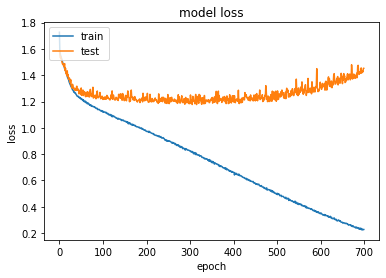

In [56]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

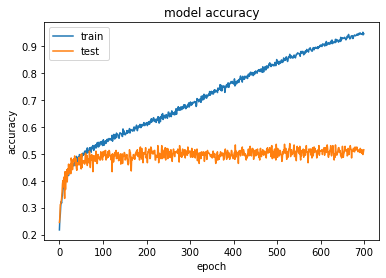

In [57]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()